# Pymaceuticals Inc.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice = combined_data["Mouse ID"].unique()
mice_count = len(mice)
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice_id = duplicate_mice["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_data.loc[combined_data["Mouse ID"] == duplicate_mice_id[0]]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_id) == False]
clean_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean = clean_mouse["Mouse ID"].unique()
mice_count_clean = len(mice_clean)
mice_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# mean
mean_tum_volume = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
# median
median_tum_volume = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
# variance
tum_volume_var = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
# standard deviation
sd_tum_volume = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
# SEM
sem_tum_volume = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tum_volume,
    "Median Tumor Volume": median_tum_volume,
    "Variance Tumor Volume": tum_volume_var,
    "Stadard Deviation Tumor Volume": sd_tum_volume,
    "SEM Tumor Volumne": sem_tum_volume})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Stadard Deviation Tumor Volume,SEM Tumor Volumne
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
summary_stats_df.shape

(10, 5)

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary_stats = clean_mouse.groupby('Drug Regimen')[['Tumor Volume (mm3)']].agg({
    'mean', 'median', 'var', 'std', 'sem'})
adv_summary_stats


Tumor Volume (mm3)                                          
                           mean       sem     median        var       std
Drug Regimen                                                             
Capomulin             40.675741  0.329346  41.557809  24.947764  4.994774
Ceftamin              52.591172  0.469821  51.776157  39.290177  6.268188
Infubinol             52.884795  0.492236  51.820584  43.128684  6.567243
Ketapril              55.235638  0.603860  53.698743  68.553577  8.279709
Naftisol              54.331565  0.596466  52.509285  66.173479  8.134708
Placebo               54.033581  0.581331  52.288934  61.168083  7.821003
Propriva              52.320930  0.544332  50.446266  43.852013  6.622085
Ramicane              40.216745  0.320955  40.673236  23.486704  4.846308
Stelasyn              54.233149  0.573111  52.431737  59.450562  7.710419
Zoniferol             53.236507  0.516398  51.818479  48.533355  6.966589

## Bar and Pie Charts

In [10]:
# First create a variable for the number of mice for reach drug:
number_of_mice = clean_mouse['Drug Regimen'].value_counts()
number_of_mice

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

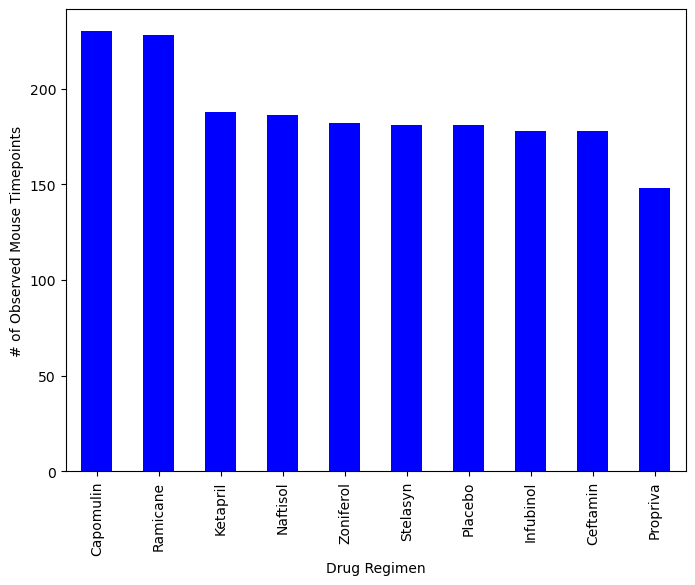

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# First create a variable for the number of mice for reach drug
number_of_mice = clean_mouse['Drug Regimen'].value_counts()
number_of_mice

#bar graph set up
bar_graph = number_of_mice.plot(kind = "bar", facecolor = "blue",
                                figsize = (8,6),
                                xlabel = "Drug Regimen",
                                ylabel = "# of Observed Mouse Timepoints")
plt.show


Text(0, 0.5, '# of Observed Mouse Timepoints')

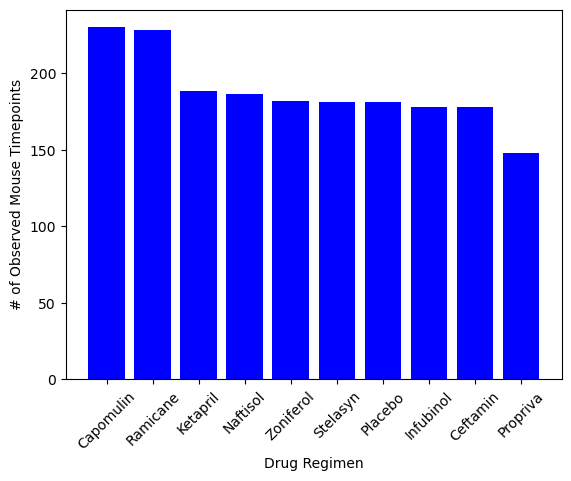

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Setting the x and y axes:
x_axis = number_of_mice.index.values
y_axis = number_of_mice.values

#Pyplot bar
plt.bar(x_axis, y_axis, color = 'b', align = 'center')

# easier read of the Drug Regimens on the x-axis
plt.xticks (rotation = 45)

#titles of x and y axes
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

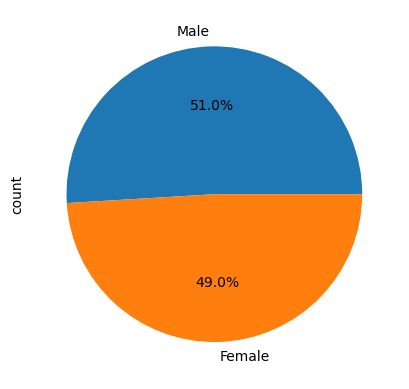

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# create a variable for female mice:
female_male_count = clean_mouse['Sex'].value_counts()

# 'y' label:

# Pie chart:
female_male_count.plot.pie(autopct = "%1.1f%%")
plt.show()

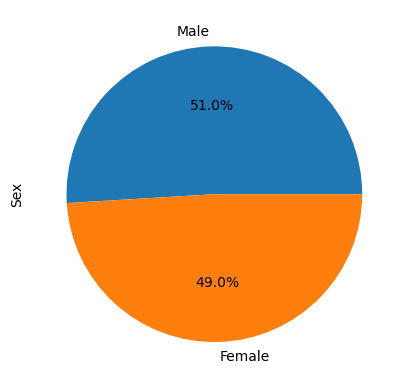

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = female_male_count.plot.pie(y = "Total Count", autopct = "%1.1f%%")

# 'y' label
plt.ylabel('Sex')
# create the pie chart:
#plt.pie(female_male_count)

# show chart:
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
group_of_mice = clean_mouse.groupby(['Mouse ID'])
max_time_mouse = group_of_mice['Timepoint'].max()
pd.DataFrame(max_time_mouse)
max_time_mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
the_merge = pd.merge(clean_mouse, max_time_mouse, how = "right", on = ["Mouse ID","Timepoint"])
the_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    each_mice = the_merge.loc[the_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(each_mice)
    
    # Determine outliers using upper and lower bounds
    quartiles = each_mice.quantile([.25, .5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    #Display the quantile information:
    print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

The lower quartile of Tumor Volume (mm3) is: 32.37735684
The upper quartile of Tumor Volume (mm3) is: 40.1592203
The interquartile range of Tumor Volume (mm3) is: 7.781863460000004
The the median of Tumor Volume (mm3) is: 38.1251644 
The lower quartile of Tumor Volume (mm3) is: 31.56046955
The upper quartile of Tumor Volume (mm3) is: 40.65900627
The interquartile range of Tumor Volume (mm3) is: 9.098536719999998
The the median of Tumor Volume (mm3) is: 36.56165229 
The lower quartile of Tumor Volume (mm3) is: 54.04860769
The upper quartile of Tumor Volume (mm3) is: 65.52574285
The interquartile range of Tumor Volume (mm3) is: 11.477135160000003
The the median of Tumor Volume (mm3) is: 60.16518046 
The lower quartile of Tumor Volume (mm3) is: 48.72207785
The upper quartile of Tumor Volume (mm3) is: 64.29983003
The interquartile range of Tumor Volume (mm3) is: 15.577752179999997
The the median of Tumor Volume (mm3) is: 59.85195552 


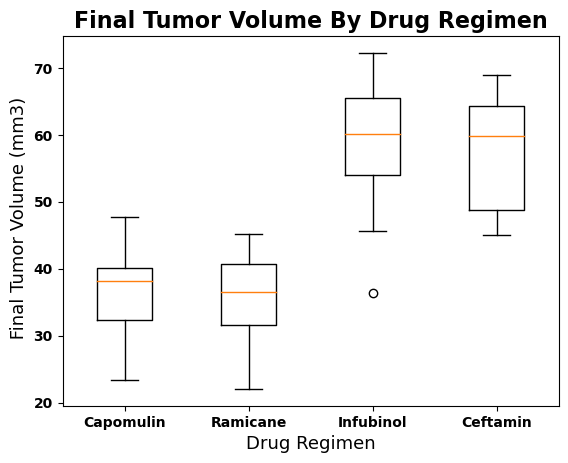

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume By Drug Regimen', fontsize=16, fontweight='bold')
ax1.set_ylabel(' Final Tumor Volume (mm3)',fontsize=13)
ax1.set_xlabel('Drug Regimen',fontsize=13)
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(Treatments)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

## Line Plot and Scatter Plot

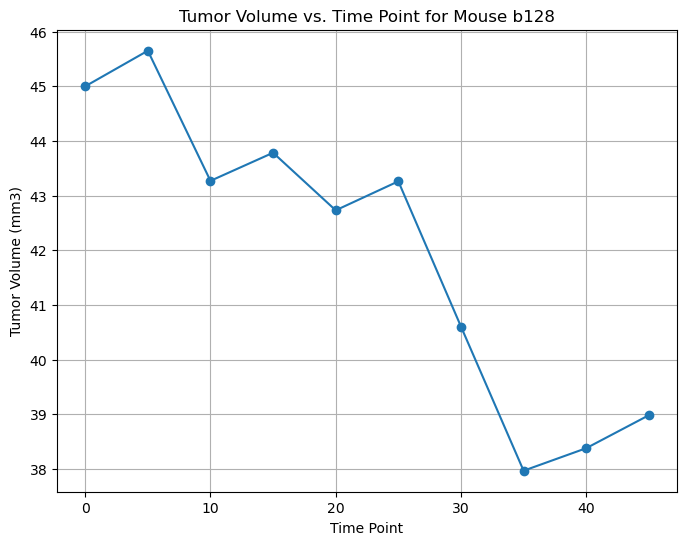

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# mice treated by Capomulin:
# Capomulin mice lists:
clean_mouse["Mouse ID"].unique()
Capo_mice = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]
Capo_mice_list = Capo_mice["Mouse ID"].unique()
Capo_mice_list

# Select a single mouse treated with Capomulin
selected_mouse = "b128"  # Replace with the desired mouse ID

# Filter the data for the selected mouse
selected_mouse_data = clean_mouse.loc[clean_mouse["Mouse ID"] == selected_mouse]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(8, 6))
plt.plot(selected_mouse_data["Timepoint"], selected_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse}")
plt.grid(True)
plt.show()

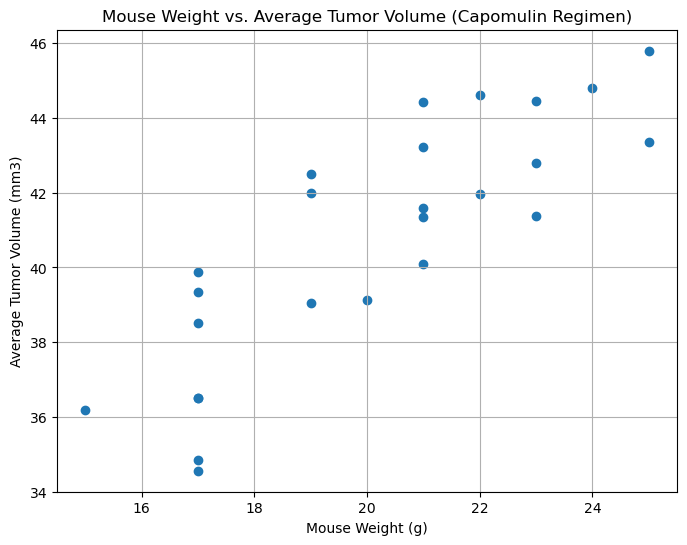

In [19]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_mouse.loc[clean_mouse["Drug Regimen"] == "Capomulin"]

# Group the data by Mouse ID and calculate the average tumor volume and weight
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_mouse_weight, avg_tumor_vol, marker="o")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.grid(True)
plt.show()